In [8]:
MODEL_FLAGS="--attention_resolutions 32,16,8 --class_cond False --dropout 0.1 --diffusion_steps 1000 --image_size 128 --learn_sigma True --noise_schedule cosine --num_channels 128 --num_heads 4 --num_res_blocks 2 --resblock_updown True --use_fp16 True --use_scale_shift_norm True"
MODEL_PATH="--model_path /poc-data/pvn/model/diffusion/seismic-diffusion-v2/model100000.pt --swin_model_path /poc-data/pvn/model/swin-transformer/SCRN/trained_model/diffusion_settings/model_080.pth"
MODEL_PATH2="--model_path /poc-data/pvn/model/diffusion/GenerativeDiffusionPrior/results/ckpt/model300000.pt --swin_model_path /poc-data/pvn/model/swin-transformer/SCRN/trained_model/diffusion_settings/model_080.pth"

SAMPLE_FLAGS="--mask_ratio 0.4 --noise_scale 0.1 --gradient_scale 0.5"
!python3 sample.py $MODEL_FLAGS $MODEL_PATH2 $SAMPLE_FLAGS --cuda_devices '0' --batch_size 16 --start_idx 0 --end_idx 1 --mode test --method dps --data_dir '/poc-data/pvn/data' --dataset 'F3,Kerry3D'

Evaluation on dataset(s):  F3,Kerry3D
(255, 601, 200)
(1252, 144, 295)
Number data: 14624
/home/vhtdemo/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
100%|████████████| 1000/1000 [06:32<00:00,  2.55it/s, distance=4.28, ssim=0.896]
[Diffusion] 0: SSIM: 0.8232268712410046 - PSNR: 25.276676983021424 - SNR: 19.429011344909668
[Swin] 0: SSIM: 0.8279228593819157 - PSNR: 25.908436656901884 - SNR: 20.05254030227661
[Diffusion] 1: SSIM: 0.8494402887340098 - PSNR: 25.289533614994998 - SNR: 19.52254295349121
[Swin] 1: SSIM: 0.8572984416324875 - PSNR: 26.243876753229216 - SNR: 20.453290939331055
[Diffusion] 2: SSIM: 0.8149576533444581 - PSNR: 24.590817177609413 - SNR: 18.749544620513916
[Swin] 2: SSIM: 0.81917854507931 - PSNR: 25.404115813894137 - SNR: 19.52781915664673
[Diffusion] 3: SSIM: 0.8256903990533256 - PSNR: 26.979547654405422 - SNR: 21.23955249786377
[Swin] 3: SSIM: 0.829437608015188 - PSNR: 27.7

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = np.load('samples/sample15.npz')

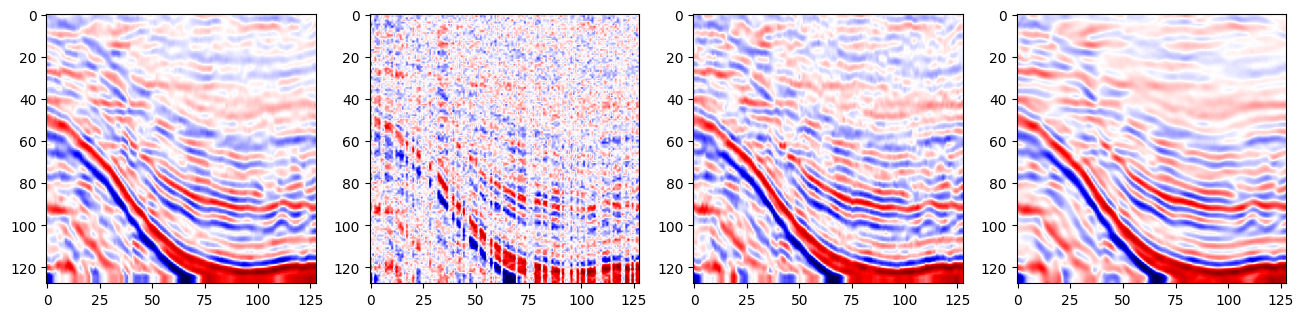

In [10]:
plt.figure(figsize=(16,64))
plt.subplot(1,4,1)
plt.imshow(data['original'], plt.cm.seismic)
plt.subplot(1,4,2)
plt.imshow(data['masked_image'], plt.cm.seismic)
plt.subplot(1,4,3)
plt.imshow(data['diffusion_sample'], plt.cm.seismic)
plt.subplot(1,4,4)
plt.imshow(data['swin_sample'], plt.cm.seismic)

In [12]:
import torch

In [41]:
from swin import SCRN, ConvTransBlock, Block, WMSA

In [53]:
swin_model = torch.load('/poc-data/pvn/model/swin-transformer/SCRN/trained_model/diffusion_settings/model_080.pth')
swin_model.to(torch.device('cuda:0'))
swin_model.eval()

SCRN(
  (m_head): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (m1): Sequential(
    (0): ConvTransBlock(
      (trans_block): Block(
        (ln1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (msa): WMSA(
          (embedding_layer): Linear(in_features=32, out_features=96, bias=True)
          (linear): Linear(in_features=32, out_features=32, bias=True)
        )
        (drop_path): Identity()
        (ln2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (mlp): Sequential(
          (0): Linear(in_features=32, out_features=128, bias=True)
          (1): ReLU()
          (2): Linear(in_features=128, out_features=32, bias=True)
        )
      )
      (conv1_1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (conv1_2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (conv_block): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [3]:
data = np.load('samples/sample0.npz')

NameError: name 'np' is not defined

In [8]:
def normalize(image):
    """Basic min max scaler.
    """
    min_ = np.min(image)
    max_ = np.max(image)
    scale = max_ - min_
    image = (image - min_) / scale
    image = image * 2 - 1
    return image

In [5]:
out = swin_model(torch.tensor(normalize(data['masked_image'])).permute(2,0,1).unsqueeze(0).to(torch.float32).to(torch.device('cuda:0')))

NameError: name 'swin_model' is not defined

In [49]:
data['masked_image'].shape

(128, 128, 1)

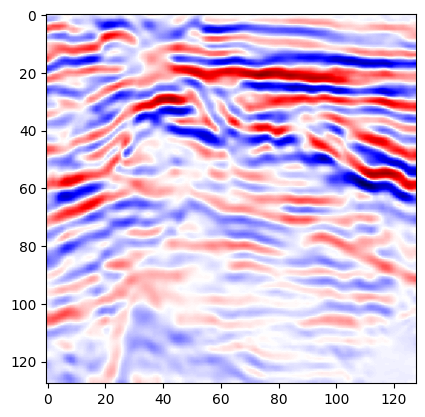

In [67]:
plt.imshow(out.cpu().detach().numpy()[0][0], plt.cm.seismic)

In [9]:
import scipy

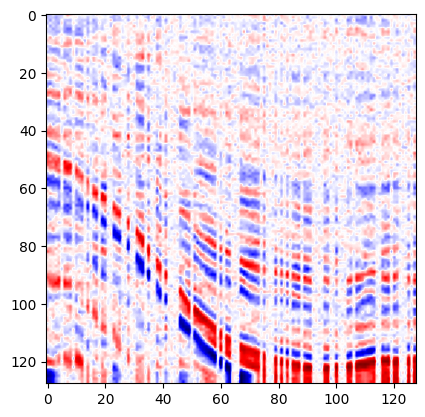

In [232]:
plt.imshow(data['masked_image'], plt.cm.seismic)

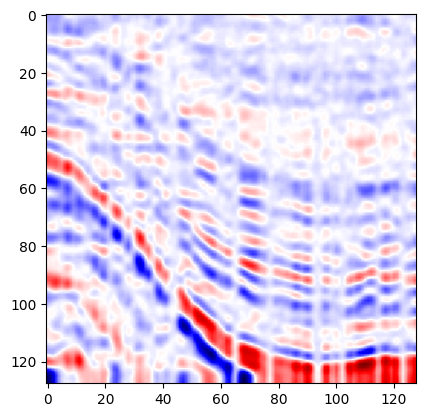

In [238]:
s = scipy.ndimage.gaussian_filter(data['masked_image'][:, :, 0], 1)
plt.imshow(s, plt.cm.seismic)

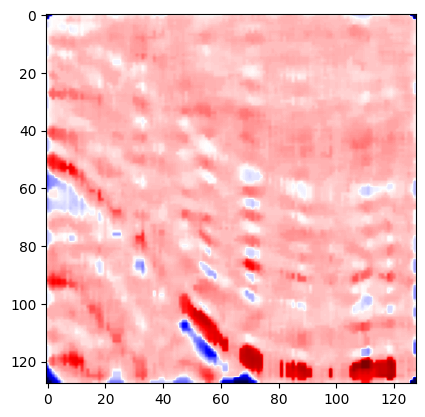

In [230]:
s = scipy.signal.median_filt(data['masked_image'][:, :, 0], 0.25)
plt.imshow(s, plt.cm.seismic)

In [10]:
from wavelet_util import DWT_2D
dwt = DWT_2D('haar')

In [13]:
xLL, xLH, xHL, xHH = dwt(torch.tensor(normalize(data['masked_image'])).permute(2,0,1).unsqueeze(0).to(torch.float32).to(torch.device('cuda:0')))

x = torch.cat((xLL, xLH, xHL, xHH), dim=1) / 2.0

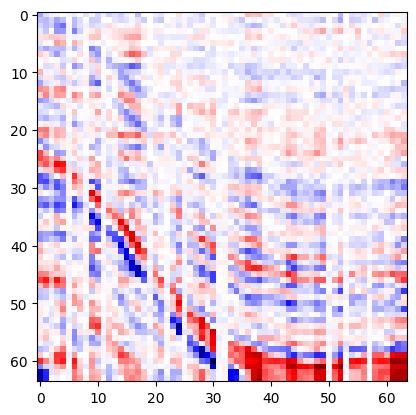

In [14]:
plt.imshow(x.cpu()[0][0], plt.cm.seismic)

In [439]:
from piq import SSIMLoss

In [464]:
ssimloss = SSIMLoss(x, data_range=-2.0 )

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [463]:
ssimloss(x,x+0.2)

tensor(0.8429, device='cuda:0')

In [15]:
from ssim_util import SSIM

In [16]:
ssim_loss = SSIM(11, size_average=True)

In [18]:
ssim_loss(x, x+0.2)

tensor([[-0.0343, -0.0163, -0.0024,  0.0054]], device='cuda:0')